In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [3]:
ds=pd.read_csv("C:/Users/raksh/Downloads/breast_cancer_dataset.csv")

In [4]:
 display(ds)

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
564,4,1,1,1,2,1,3,2,1,2
565,5,7,10,10,5,10,10,10,1,4
566,3,1,2,1,2,1,3,1,1,2
567,4,1,1,1,2,3,2,1,1,2


In [5]:
ds.head()


,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [6]:
ds.tail()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
564,4,1,1,1,2,1,3,2,1,2
565,5,7,10,10,5,10,10,10,1,4
566,3,1,2,1,2,1,3,1,1,2
567,4,1,1,1,2,3,2,1,1,2
568,8,4,4,1,6,10,2,5,2,4


In [7]:
ds.size

5690

In [8]:
ds.columns

Index(['clump_thickness', 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitosis', 'class'],
      dtype='object')

In [9]:
ds.describe()


,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,4.539543,3.184534,3.265378,2.845343,3.298770,-2632.518453,3.490334,2.989455,1.637961,2.731107
std,2.896501,3.002236,2.955935,2.873626,2.304775,16035.653408,2.324925,3.091315,1.773941,0.964018
min,1.000000,1.000000,1.000000,1.000000,1.000000,-100000.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,8.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


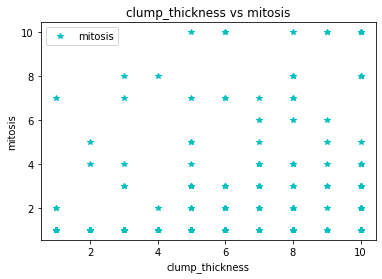

In [10]:
ds.plot(x='clump_thickness',y='mitosis',style='*',color='c')
plt.title('clump_thickness vs mitosis')
plt.xlabel('clump_thickness')
plt.ylabel('mitosis')
plt.show()

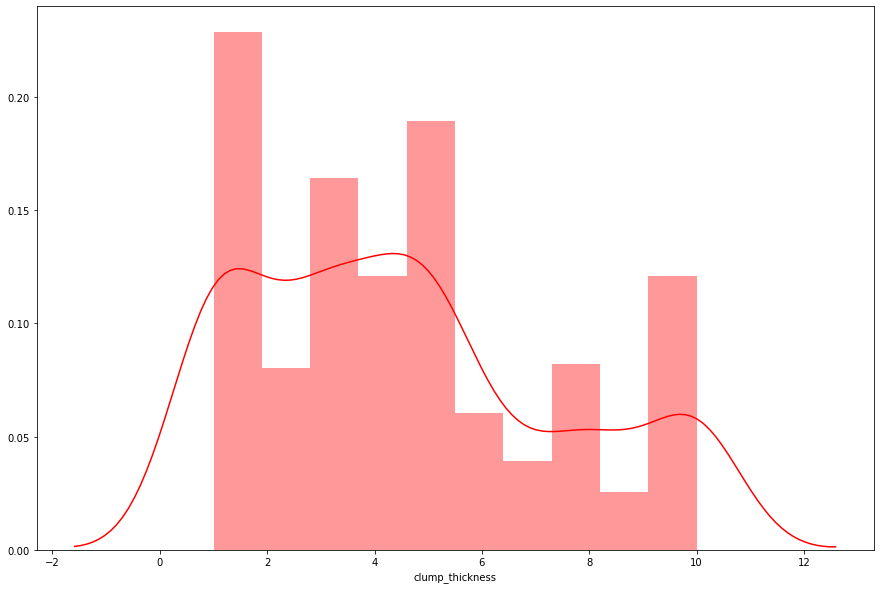

In [11]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sb.distplot(ds['clump_thickness'],color='r')


In [12]:
X=ds['clump_thickness'].values.reshape(-1,1)
y=ds['mitosis'].values.reshape(-1,1)


In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
print('Intercept of the curve is:',lr.intercept_)
print('Slope of the curve is:',lr.coef_)

Intercept of the curve is: [0.5673489]
Slope of the curve is: [[0.23388759]]


In [16]:
y_pred=lr.predict(X_test)

In [17]:
df=pd.DataFrame({'Actual Value': y_test.flatten(),'Predicted Value': y_pred.flatten()})
df

,Actual Value,Predicted Value
0,1,1.736787
1,1,2.438450
2,1,1.736787
3,1,2.438450
4,1,1.970674
...,...,...
109,4,2.906225
110,1,1.502899
111,1,1.736787
112,1,0.801236


In [18]:
pred=lr.predict(X_test)

In [19]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 1.075987450735194
Mean Squared Error: 3.4018105010242397
Root Mean Squared Error: 1.8443997671394994


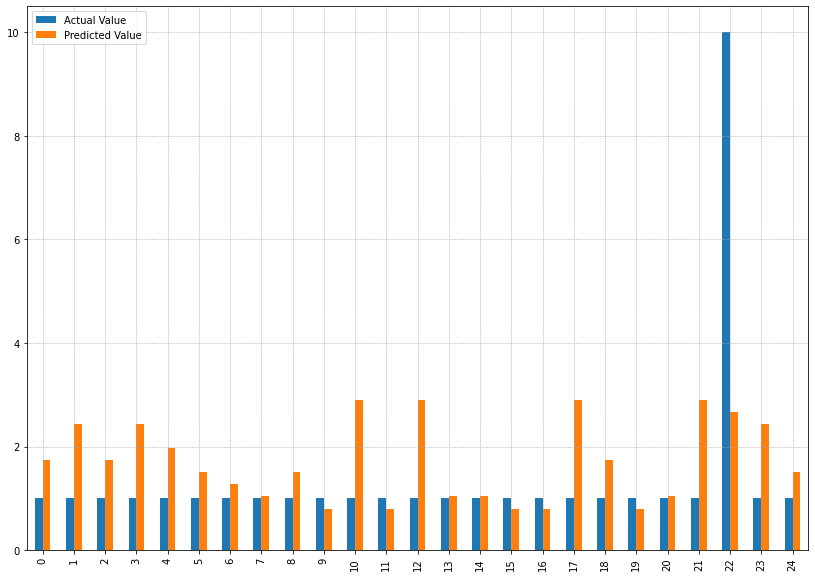

In [20]:
dafr=df.head(25)
dafr.plot(kind='bar',figsize=(14,10))
plt.grid(which='both', linestyle='--', linewidth='0.5', color='0.65')
plt.show()

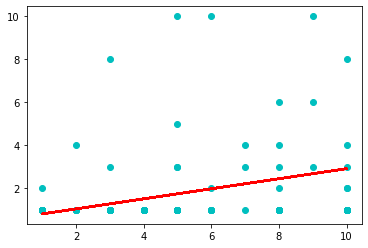

In [21]:
plt.scatter(X_test,y_test,color='c')
plt.plot(X_test,y_pred,color='r',linewidth=2)
plt.show()